## Shape orientation (principle axis)

Have you ever wondered how to define the "direction" of a shape? Imagine you’re holding a leaf, and you want to describe its natural orientation. You might intuitively align it along its longest direction. This intuitive idea is precisely what principle axes capture: the main directions along which a shape extends.

**What Are Principle Axes?**

A 2D shape has two principle axes:

- **The principle major axis** is the direction in which the shape is most extended. If the shape were a beam, this would be the axis along which it resists bending the most.

- **The principle minor axis** is perpendicular to the major axis and represents the direction where the shape is least extended—hence, it bends more easily along this axis.

These axes give a natural way to describe the orientation of a shape, providing a coordinate system that aligns with its intrinsic geometry. Orientation can reveal important biological insights, such as how they align in response to mechanical forces.

Now, let’s get a bit more formal. Given a polygon with vertices $\mathbf{v}_{i} = (x_{i},y_{i})$, ordered anticlockwise, the **second moments of area** describe how the shape's mass (or area) is distributed relative to the coordinate axes:
$$
\begin{align}
    I_{x} &= \frac{1}{12}\sum_{i=1}^{n-1} \left( x_{i}y_{i+1} - x_{i+1}y_{i} \right) \left(  x_{i}^{2} + x_{i}x_{i+1} + x_{i+1}^{2}  \right), \\
    I_{y} &= \frac{1}{12}\sum_{i=1}^{n-1} \left( x_{i}y_{i+1} - x_{i+1}y_{i} \right) \left(  y_{i}^{2} + y_{i}y_{i+1} + y_{i+1}^{2}  \right), \\
    I_{xy} &= \frac{1}{24} \sum_{i = 1}^{n-1} \left( x_{i}y_{i+1} - x_{i+1}y_{i} \right) \left(  x_{i}y_{i+1} + 2x_{i}y_{i} + 2x_{i+1}y_{i+1} + x_{i+1}y_{i}  \right).
\end{align}
$$

These quantities help us determine the **principle angle**, $\theta_O$, which tells us how much the shape is rotated relative to the x-axis:

$$ \theta_{O} = \frac{1}{2}\arctan \left( \frac{2I_{xy}}{I_{y} - I_{x}} \right). $$

Principle angle gives us a way to talk about the **intrinsic orientation** of a shape, independent of how it's positioned in space. Whether in biomechanics, medical imaging, or even material science, this concept helps us quantify and analyse patterns in a rigorous yet intuitive way.

In this tutorial, we’ll explore how to compute and visualise principle axes for different shapes in MuSpAn! We'll start by loading in a dataset with shapes and check what labels are contained in the domain.

In [1]:
# Import the muspan and plt libraries
import muspan as ms
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import numpy as np
plt.rcParams['figure.dpi'] = 150

# Load the example domain data for 'Xenium-Healthy-Colon'
domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

# Check out what labels are available to grab a cell of interest 
domain.print_labels()

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []
              Cell ID  Transcript Counts   Cell Area Cluster ID  Nucleus Area  \
object_id                                                                       
0.0        nhdfilal-1              230.0   43.304845  Cluster 7           NaN   
1.0        dkhbniei-1              197.0   40.053595  Cluster 8           NaN   
2.0        dkjajkjl-1              279.0   53.284377  Cluster 6           NaN   
3.0        ndijeadf-1              299.0   54.277814  Cluster 6           NaN   
4.0        dkjabafb-1              581.0  106.568754  Cluster 5           NaN   
...               ...                ...         ...        ...           ...   
74169.0    dfcbmddg-

To demonstrate how the Principle axis is able to describe the orientation of a shape, we'll pull out a particular cell using the 'Cell ID' labels on the 'Cell boundaries'.

Text(0.5, 1.0, 'Single cell: nkajedig-1')

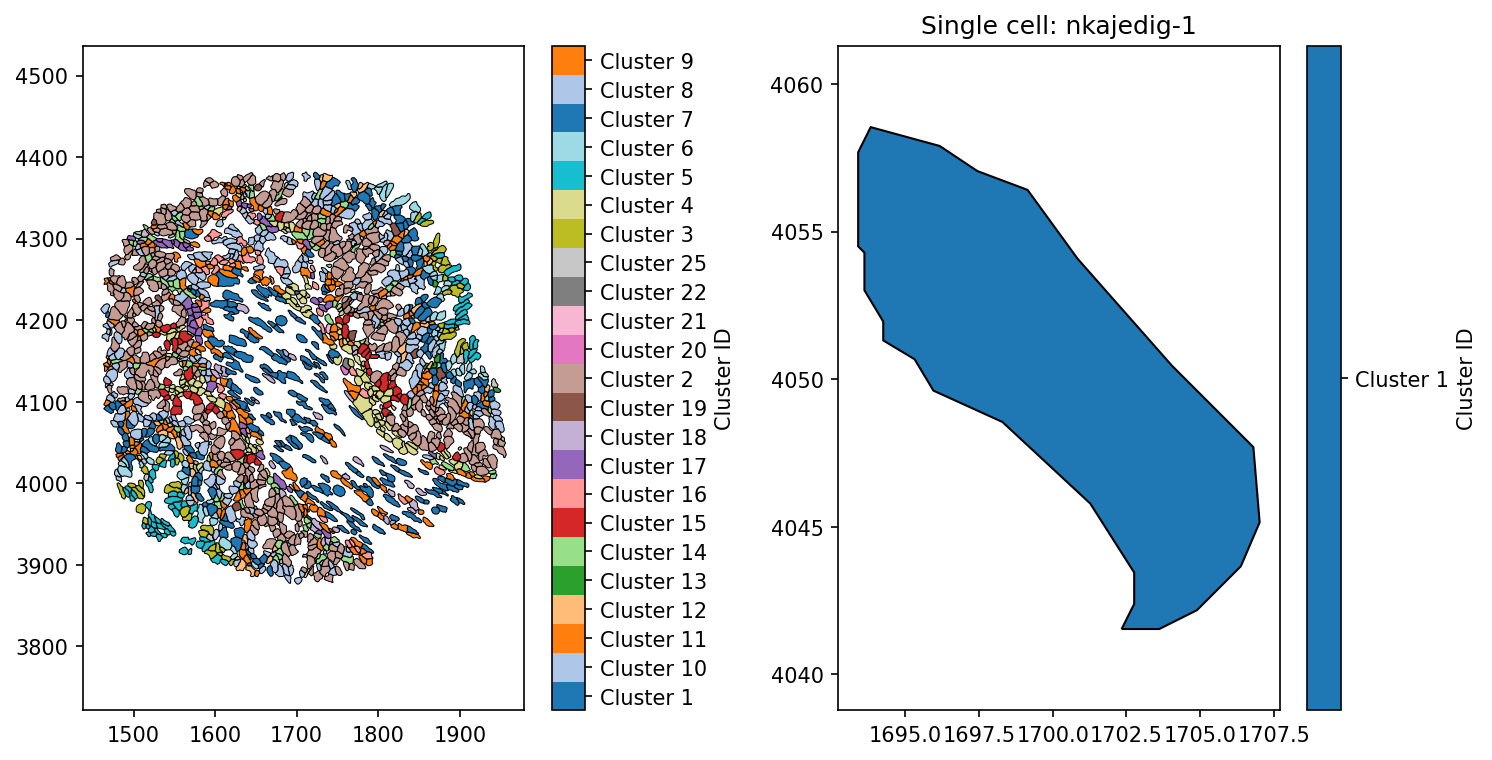

In [2]:
# Pull out a single cell from the domain
example_cell_query = ms.query.query_container(('collection', 'Cell boundaries'), 'AND', ('Cell ID', 'nkajedig-1'), domain)

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Visualise the domain, colouring by 'Cluster ID' and plotting the cell boundaries
ms.visualise.visualise(domain, color_by='Cluster ID', objects_to_plot=('collection', 'Cell boundaries'), shape_kwargs=dict(alpha=1, linewidth=0.5), ax=ax[0])

# Visualise the single cell, colouring by 'Cluster ID'
ms.visualise.visualise(domain, color_by='Cluster ID', objects_to_plot=example_cell_query, shape_kwargs=dict(alpha=1), ax=ax[1])
ax[1].set_title('Single cell: nkajedig-1')

Now we have picked out a cells from out domain, we can compute it's principle axis using the `principle_axis` function in the `geometry` submodule of MuSpAn. This requires no tuning of parameters, only that we pass it shape-like objects. The function has three outputs:

1. **principle_axis_angle**: a list of principle angles for each object passed as a population.

2. **major_axis**: a list of the vectors defining the major axis of the shape.

3. **object_ids**: a list of the object IDs ordered to match the prior two lists.

We can compute the `principle_axis` on our example cells we isolated above.

In [3]:
# Calculate the principle axis for the example cell
principle_axis_angle_example, major_axis_example, object_indices_example = ms.geometry.principle_axis(
    domain, 
    population=example_cell_query, 
    add_as_label=True, 
    label_name='Principle axis angle (rad)', 
    cmap='coolwarm'
)

# Print the principle axis angle of the cell
print('The principle axis angle of the cell is:', principle_axis_angle_example)

The principle axis angle of the cell is: [np.float64(-0.8638009608340973)]


We can see that out cell stretched from top-left to bottom-right. This is reflected in the value of the principle axis angle of the cell being less than 0, as 0-angle represents the horizontal. To demonstrate what is being measured more explicitly, we'll plot the major axis on the cell.

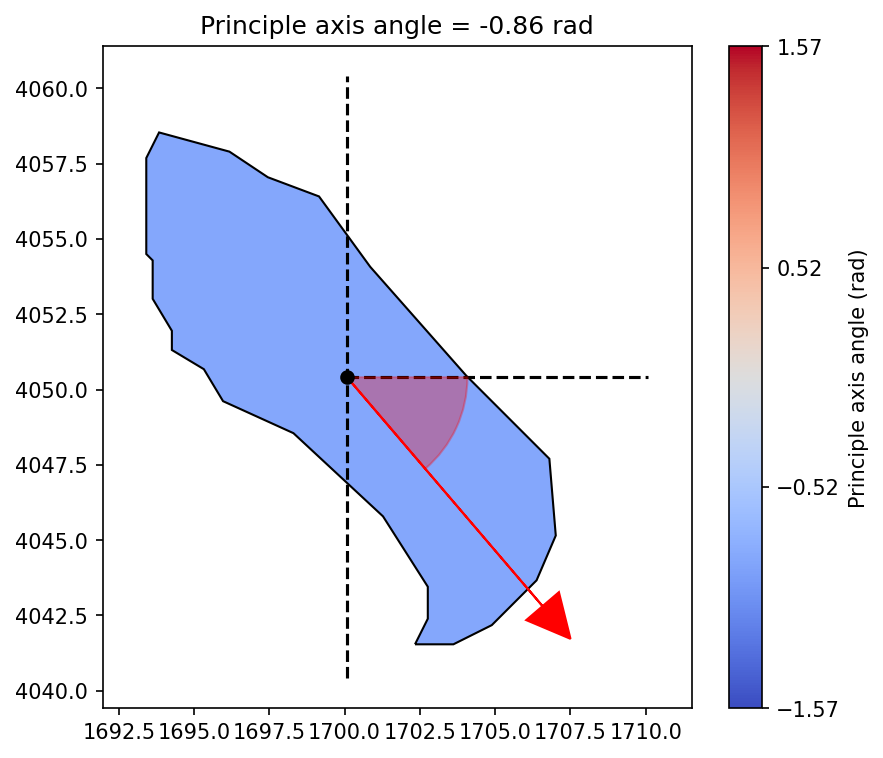

In [4]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Visualize the domain with the principle axis angle for the example cell
ms.visualise.visualise(domain, color_by='Principle axis angle (rad)', objects_to_plot=example_cell_query, 
                                           shape_kwargs=dict(alpha=1), ax=ax, vmin=-3.14/2, vmax=3.14/2)

# Set the title of the plot with the principle axis angle
ax.set_title(f'Principle axis angle = {np.round(principle_axis_angle_example[0], decimals=2)} rad')

# Define a scale factor for the arrows
scale_factor = 10

# Loop through each vector in the major axis example
i, vector = 0,major_axis_example[0]
# Calculate the start and end points of the arrow
start_x, start_y = vector[0]
end_x = vector[1, 0] - domain.objects[object_indices_example[i]].centroid[0]
end_y = vector[1, 1] - domain.objects[object_indices_example[i]].centroid[1]

# Draw the arrow representing the major axis
ax.arrow(start_x, start_y, end_x * scale_factor, end_y * scale_factor, 
                        color='red', head_width=scale_factor / 7, head_length=scale_factor / 7, zorder=150)

# Draw dashed lines representing the centroid axes
centroid_x, centroid_y = domain.objects[object_indices_example[i]].centroid
ax.plot([centroid_x, centroid_x + scale_factor], [centroid_y, centroid_y], 
                linestyle='--', color='black', zorder=50)
ax.plot([centroid_x, centroid_x], [centroid_y - scale_factor, centroid_y + scale_factor], 
                linestyle='--', color='black', zorder=50)

# Highlight the centroid with a scatter plot
ax.scatter(centroid_x, centroid_y, color='black', zorder=150)

# Calculate the angle between the arrow and the x-axis
angle = np.arctan2(end_y, end_x)

# Create a wedge to visualize the angle
wedge = Wedge(center=(centroid_x, centroid_y), r=4, 
                                theta1=np.degrees(angle), theta2=0, 
                                color='red', alpha=0.3, zorder=120)

# Add the wedge to the plot
ax.add_patch(wedge)

We can see more clearly now that the principle axis angle (red shaded region) is the angle between the horizontal x-axis and the major principle vector (stretch direction). In MuSpAn this is always defined on the right-hand plane of the coordinates centred at the objects centroid, i.e., the reverse vector is also a major principle vector but would make comparing the principle axis angles between objects inconsistent. 

As with the other shape descriptors, we can compute this on all our cells by altering our populaton query. We also enable the function to add the angles as labels to our domain objects.

(<Figure size 1500x1200 with 2 Axes>, <Axes: >)

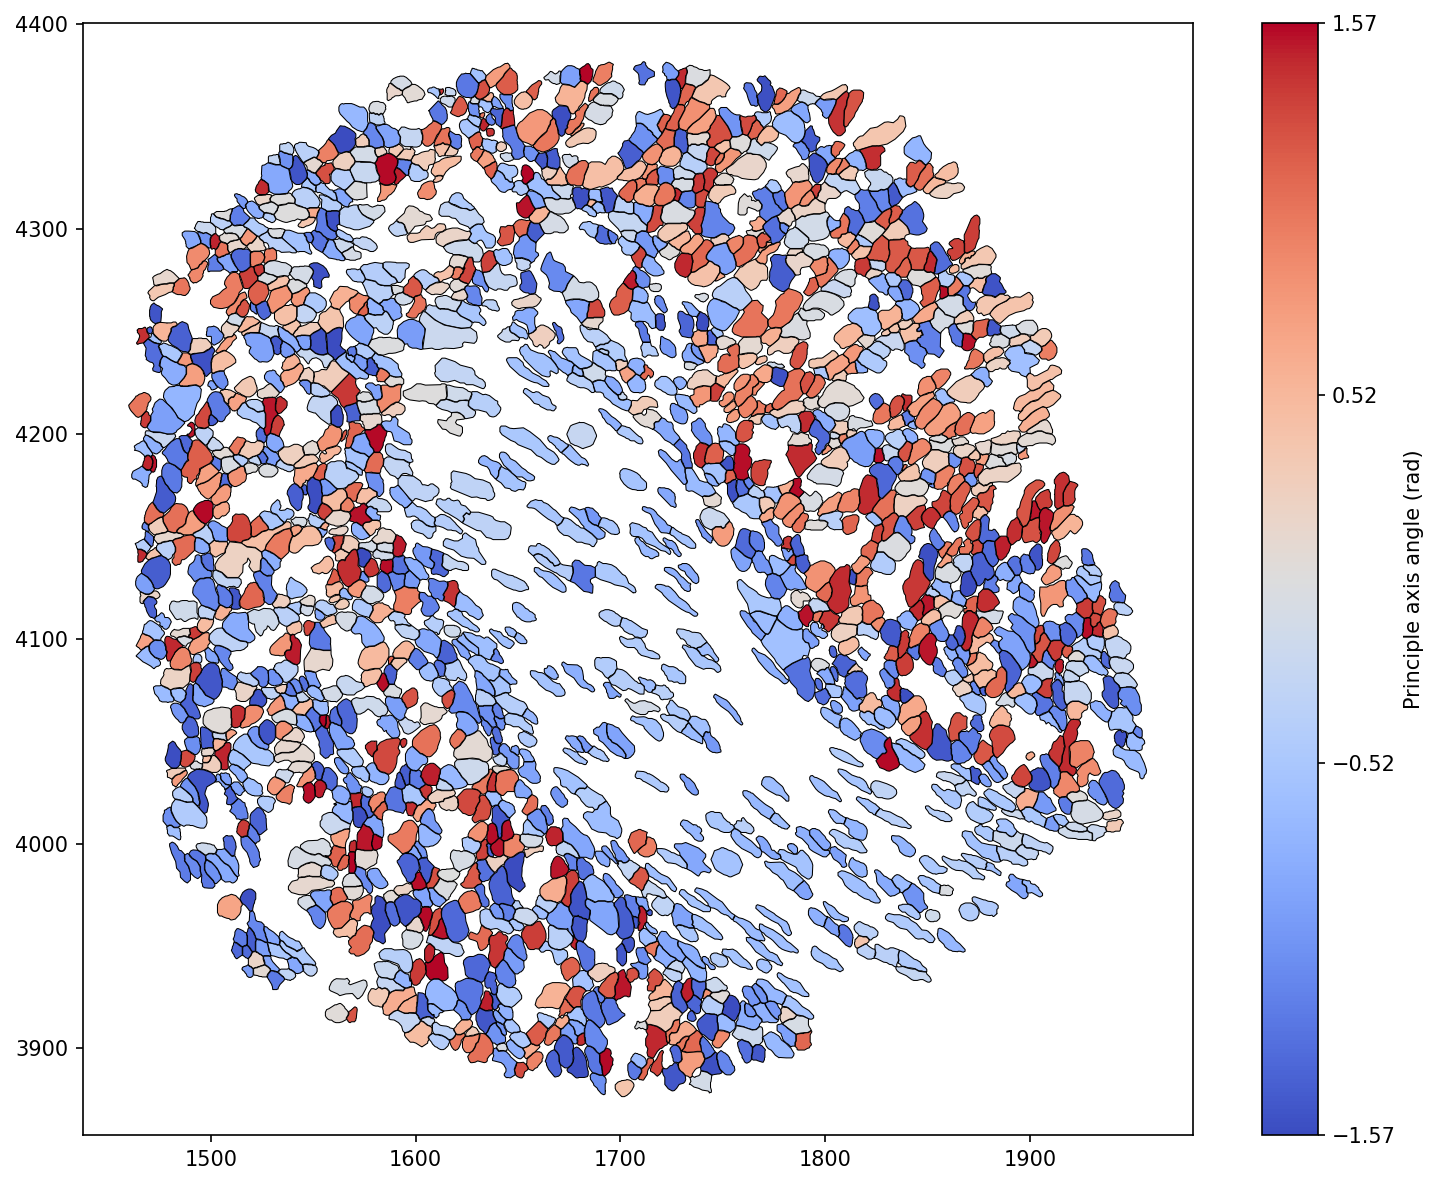

In [5]:
# Calculate the principle axis for all cells in the domain
principle_axis_angle_all, major_axis_all, object_indices_all = ms.geometry.principle_axis(
    domain, 
    population=('collection', 'Cell boundaries'), 
    add_as_label=True, 
    label_name='Principle axis angle (rad)', 
    cmap='coolwarm'
)

# Visualize the domain with the principle axis angle for all cells
ms.visualise.visualise(
    domain, 
    color_by='Principle axis angle (rad)', 
    objects_to_plot=('collection', 'Cell boundaries'), 
    shape_kwargs=dict(alpha=1, linewidth=0.5)
)


We can see that the inner most stromal cells seem to have a particular directionality to them compared to the outer cells in the domain. We can isolate this observation as in our previous shape descriptors tutorial using our query infrastructure.

(<Figure size 1200x1050 with 5 Axes>, <Axes: >)

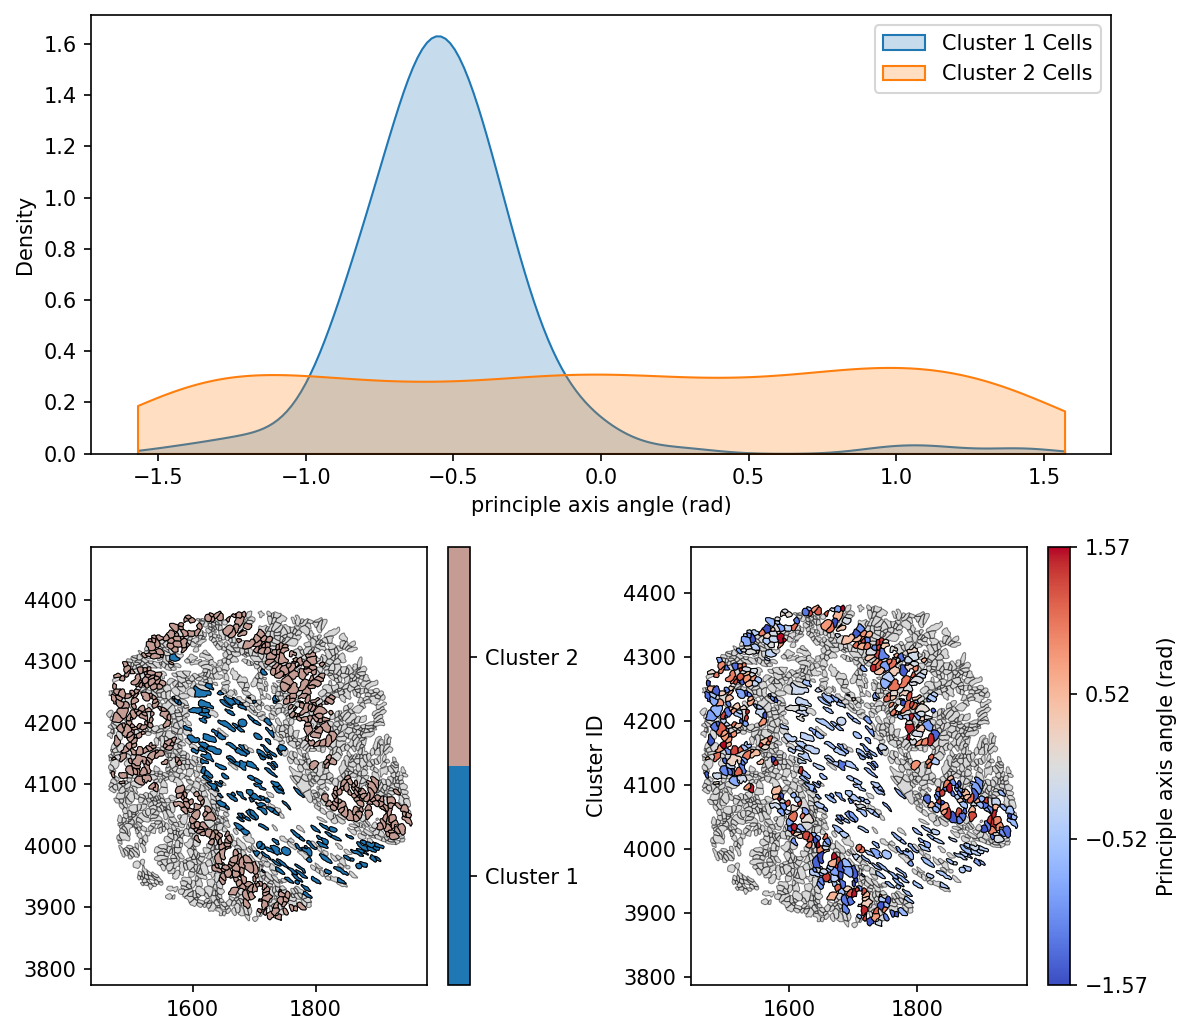

In [6]:
# We'll import seaborn to create a KDE plot
import seaborn as sns

# Query the cell boundaries for Cluster 1 and Cluster 2
cell_1 = ms.query.query_container(('collection', 'Cell boundaries'), 'AND', ('Cluster ID', 'Cluster 1'), domain)
cell_2 = ms.query.query_container(('collection', 'Cell boundaries'), 'AND', ('Cluster ID', 'Cluster 2'), domain)

# this query is just for visualisation purposes - we want both Cluster 1 and Cluster 2 cells
cell_1_and_2=ms.query.query_container(('collection', 'Cell boundaries'), 'AND', ms.query.query(domain,('label','Cluster ID'),'in',['Cluster 1','Cluster 2']),domain)


# Calculate the principle axis for Cluster 1 and Cluster 2 cells
principle_axis_angle_1,_,_=ms.geometry.principle_axis(domain, population=cell_1,add_as_label=True, label_name='Principle axis angle (rad)', cmap='coolwarm')
principle_axis_angle_2,_,_=ms.geometry.principle_axis(domain, population=cell_2,add_as_label=True, label_name='Principle axis angle (rad)', cmap='coolwarm')

# Create a figure with two subplots
fig=plt.figure(figsize=(8, 7))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Plot KDE of circularity for Cluster 1 and Cluster 2 cells on ax1 - a smoothed histogram
sns.kdeplot(principle_axis_angle_1, ax=ax1, label='Cluster 1 Cells', shade=True,clip=(-3.14/2,3.14/2))
sns.kdeplot(principle_axis_angle_2, ax=ax1, label='Cluster 2 Cells', shade=True,clip=(-3.14/2,3.14/2))
ax1.set_xlabel('principle axis angle (rad)')
ax1.set_ylabel('Density')
ax1.legend()


# Visualise the domain with cell boundaries and principle axis for Cluster 1 and Cluster 2 cells
ms.visualise.visualise(domain, color_by=('constant', [0.7, 0.7, 0.7, 1]), objects_to_plot=('collection', 'Cell boundaries'), shape_kwargs=dict(alpha=0.5,linewidth=0.5), ax=ax3)
ms.visualise.visualise(domain, color_by='Principle axis angle (rad)', objects_to_plot=cell_1_and_2, shape_kwargs=dict(alpha=1,linewidth=0.5), ax=ax3,vmin=-3.14/2,vmax=3.14/2) 

# Visualise the domain with cell boundaries and Cluster ID for Cluster 1 and Cluster 2 cells
ms.visualise.visualise(domain, color_by=('constant', [0.7, 0.7, 0.7, 1]), objects_to_plot=('collection', 'Cell boundaries'), shape_kwargs=dict(alpha=0.5,linewidth=0.5), ax=ax2)
ms.visualise.visualise(domain, color_by='Cluster ID', objects_to_plot=cell_1_and_2, shape_kwargs=dict(alpha=1,linewidth=0.5), ax=ax2)

Here we can see that Cluster 1 cells are generally orientated similarly, with a negative principle axis angles. Whereas Cluster 2 cells are uniformly distributed in the orientation, suggesting the existence of different mechanical properties, stresses and phenotypic traits of these populations, purely from a geometric perspective.

Understanding the principle axes of a shape provides a powerful tool for analysing its orientation and structural properties. We’ve explored using MuSpAn how these axes help describe the way shapes distribute their area and resist bending forces. In biomedical applications, principle axes play a crucial role in studying cellular alignment, tissue structures, and medical imaging, enabling more precise analyses and insights.